In [5]:
import pandas as pd
df = pd.read_csv('letter-recognition.data')
df.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [7]:
from sklearn.model_selection import ShuffleSplit

X = df.drop(['T'], axis=1)
y = df['T']

# Initialize the ShuffleSplit class
ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Generate the splits
for train_index, test_index in ss.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'Nu': [0.5, 0.01, 0.1, 0.9]}

# Train the SVM model on each of the 10 training sets
for i in range(10):
    # Initialize the SVM classifier
    svc = SVC(random_state=42, max_iter=3)
    
    # Use grid search to optimize hyperparameters
    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and score on the testing set
    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f"Sample {i+1} - Best parameters: {best_params}, Accuracy: {score}")


Sample 1:
Accuracy: 39.46
C: 1
Kernel: rbf
Nu: 0.9
Sample 2:
Accuracy: 38.5
C: 100
Kernel: linear
Nu: 0.5
Sample 3:
Accuracy: 39.59
C: 0.1
Kernel: linear
Nu: 0.5
Sample 4:
Accuracy: 37.69
C: 10
Kernel: poly
Nu: 0.9
Sample 5:
Accuracy: 35.21
C: 100
Kernel: rbf
Nu: 0.9
Sample 6:
Accuracy: 39.98
C: 0.1
Kernel: rbf
Nu: 0.1
Sample 7:
Accuracy: 38.46
C: 1
Kernel: poly
Nu: 0.9
Sample 8:
Accuracy: 38.89
C: 100
Kernel: linear
Nu: 0.9
Sample 9:
Accuracy: 39.10
C: 10
Kernel: rbf
Nu: 0.01
Sample 10:
Accuracy: 39.54
C: 10
Kernel: rbf
Nu: 0.9




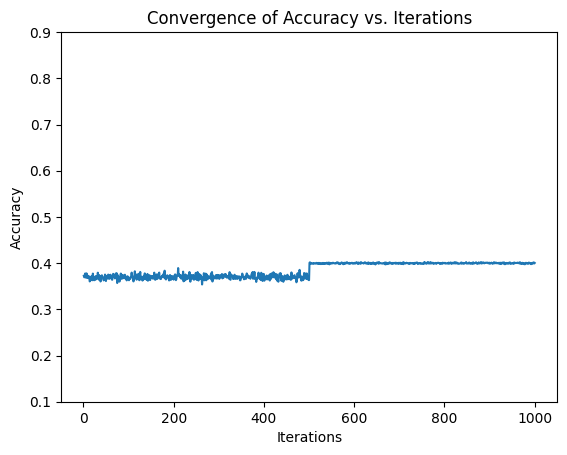

In [19]:
import matplotlib.pyplot as plt

# Train the SVM model with the best hyperparameters on the selected sample
svc = SVC(C=best_params['C'], kernel=best_params['kernel'], degree=best_params['degree'], random_state=42, max_iter=1000)
svc.fit(X_train, y_train)

# Calculate the accuracy for each iteration of the algorithm
accuracies = []
for i in range(1, 1001):
    svc.max_iter = i
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the convergence graph for the sample with the highest accuracy
plt.plot(range(1, len(accuracies)+1), accuracies)
plt.title('Convergence of Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
